170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Training model without regularization...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3068 - loss: 1.8351 - val_accuracy: 0.5523 - val_loss: 1.2640
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6117 - loss: 1.0845 - val_accuracy: 0.6726 - val_loss: 0.9212
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7145 - loss: 0.8035 - val_accuracy: 0.7200 - val_loss: 0.8133
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7634 - loss: 0.6688 - val_accuracy: 0.7395 - val_loss: 0.7595
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8074 - loss: 0.5433 - val_accuracy: 0.7643 - val_loss: 0.7133
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8395 - loss: 0.4597 - val_accuracy: 0.7694 - val_loss: 0.6998
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8670 - loss: 0.3758 - val_accuracy: 0.7706 - val_loss: 0.7456
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8895 - loss: 0.3131 - val_accura

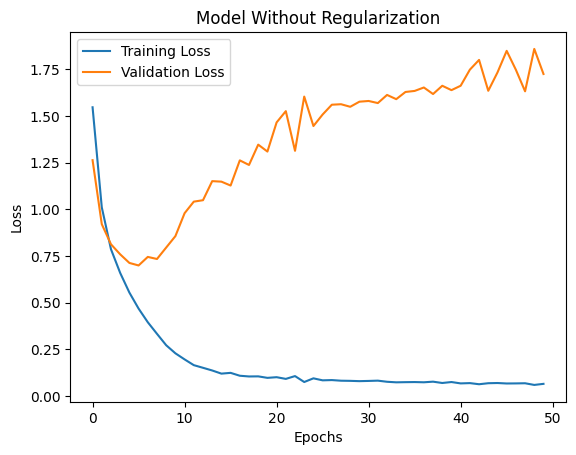

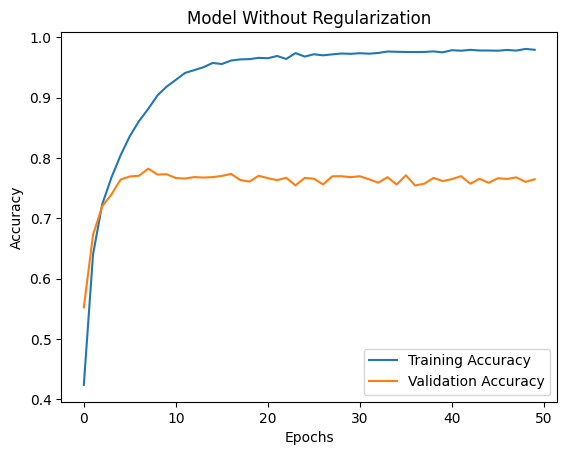

Training model with regularization, dropout, and data augmentation...
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3110 - loss: 2.1674 - val_accuracy: 0.5342 - val_loss: 1.3422
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5035 - loss: 1.4033 - val_accuracy: 0.5477 - val_loss: 1.3777
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5768 - loss: 1.2275 - val_accuracy: 0.5798 - val_loss: 1.2354
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6136 - loss: 1.1361 - val_accuracy: 0.6401 - val_loss: 1.1032
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6425 - loss: 1.0635 - val_accuracy: 0.6432 - val_loss: 1.1793
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6680 - loss: 1.0016 - val_accuracy: 0.6843 - val_loss: 0.9476
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6868 - loss: 0.9540 - val_accuracy: 0.6783 - val_loss: 0.9762
Epoch 8/50
782/782 ━

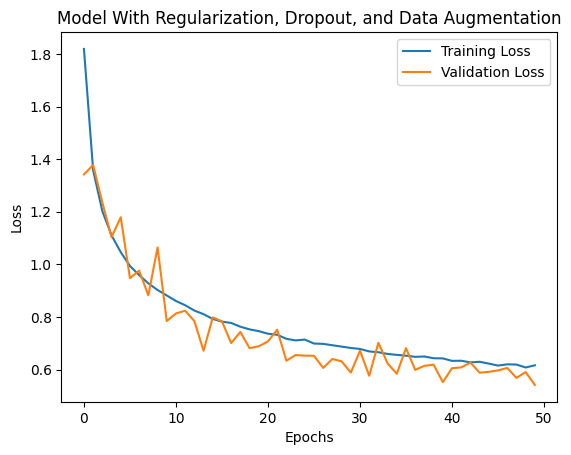

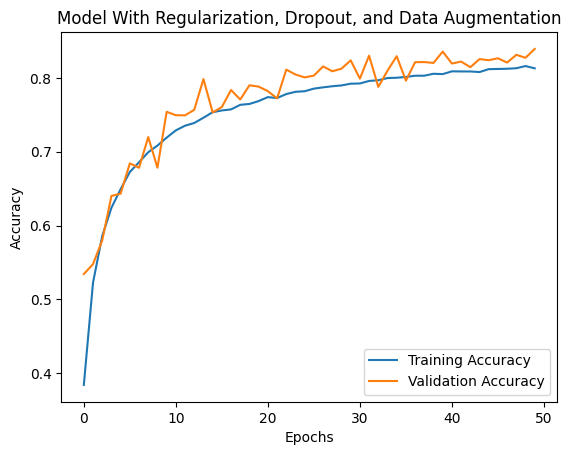

+------------------------+---------------------+-----------------------+
| Model                  |   Training Accuracy |   Validation Accuracy |
+========================+=====================+=======================+
| Without Regularization |              0.9794 |                0.7648 |
+------------------------+---------------------+-----------------------+
| With Regularization    |              0.8132 |                0.8395 |
+------------------------+---------------------+-----------------------+


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model without regularization
def create_model_no_reg():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN model with regularization, dropout, and data augmentation
def create_model_with_reg():
    model = models.Sequential()

    # Data augmentation
    model.add(layers.RandomFlip("horizontal"))
    model.add(layers.RandomRotation(0.1))
    model.add(layers.RandomZoom(0.1))

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Dropout after pooling

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Dropout after pooling

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))  # Dropout after pooling

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))  # Dropout in dense layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model without regularization
print("Training model without regularization...")
model_no_reg = create_model_no_reg()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(x_test, y_test), verbose=1)

# Plot training and validation loss for the model without regularization
plt.plot(history_no_reg.history['loss'], label='Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='Validation Loss')
plt.title('Model Without Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for the model without regularization
plt.plot(history_no_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Without Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train the model with regularization, dropout, and data augmentation
print("Training model with regularization, dropout, and data augmentation...")
model_with_reg = create_model_with_reg()
history_with_reg = model_with_reg.fit(x_train, y_train, epochs=50, batch_size=64,
                                      validation_data=(x_test, y_test), verbose=1)

# Plot training and validation loss for the model with regularization
plt.plot(history_with_reg.history['loss'], label='Training Loss')
plt.plot(history_with_reg.history['val_loss'], label='Validation Loss')
plt.title('Model With Regularization, Dropout, and Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for the model with regularization
plt.plot(history_with_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model With Regularization, Dropout, and Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display final accuracies in a tabular format
final_train_accuracy_no_reg = history_no_reg.history['accuracy'][-1]
final_val_accuracy_no_reg = history_no_reg.history['val_accuracy'][-1]

final_train_accuracy_with_reg = history_with_reg.history['accuracy'][-1]
final_val_accuracy_with_reg = history_with_reg.history['val_accuracy'][-1]

table = [
    ["Model", "Training Accuracy", "Validation Accuracy"],
    ["Without Regularization", f"{final_train_accuracy_no_reg:.4f}", f"{final_val_accuracy_no_reg:.4f}"],
    ["With Regularization", f"{final_train_accuracy_with_reg:.4f}", f"{final_val_accuracy_with_reg:.4f}"],
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))